#### Entrada: Pickles gerados por instalacao_medidor.ipynb
#### Saída: csv (pode ser para Light ou EDP)

---

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import sys
import os
from os import listdir as ld
from os.path import join
from pathlib import Path
import pandas as pd
sys.path.append(join(Path(os.getcwd()).parent, 'lib'))
from mainlib import dframe
from of_proc import pload

Using TensorFlow backend.


---

### Escolha

#### Light

In [2]:
conc = 'light'
data = dframe('../../info/info-LIGHT.json').data
dmi = pload('../../pickles/medidor_instalacao_light_4a7.pkl')
hormed = pload('../../pickles/horarios_medicao_light_4a7.pkl')

#### EDP

---

In [3]:
MM_PATH = data['paths']['mm']['input']

In [4]:
mm = pd.read_csv(MM_PATH, sep = ';',parse_dates=[0],index_col=[0])

---

---

In [5]:
mm.head()

,07266674,07266923,07267331,07267651,07311230,07311230.1,07329402,07516510,07516555,07581189,...,09135666,09135823,09136081,09222235,09222264,09224864,09308547,09445026,09572635,09581032
DATA/Hora,,,,,,,,,,,,,,,,,,,,,
2019-04-01 01:00:00,2.54,NaN,0.31,0.34,NaN,NaN,3.94,0.0,3.66,1.31,...,0.32,1.69,NaN,0.73,5.72,0.84,0.01,0.27,0.19,NaN
2019-04-01 02:00:00,2.59,NaN,0.36,0.36,NaN,NaN,3.70,0.0,3.63,0.32,...,0.32,1.92,NaN,0.73,5.75,0.89,0.01,0.28,0.24,NaN
2019-04-01 03:00:00,2.52,NaN,0.34,0.36,NaN,NaN,3.55,0.0,3.74,0.30,...,0.32,1.43,NaN,0.75,5.70,0.85,0.01,0.27,0.19,NaN
2019-04-01 04:00:00,2.45,NaN,0.34,0.34,NaN,NaN,3.48,0.0,3.71,0.30,...,0.32,1.48,NaN,0.76,5.78,0.89,0.01,0.27,0.28,NaN
2019-04-01 05:00:00,3.70,NaN,0.36,0.36,NaN,NaN,3.55,0.0,3.68,0.30,...,0.32,1.55,NaN,0.74,5.77,0.86,0.01,0.27,0.17,NaN


In [6]:
mm.columns = [int(float(c)) for c in mm.columns]

In [7]:
l = [i for i in mm.columns if i  in dmi.keys()]
len(l), mm.shape

(1527, (2952, 1545))

In [8]:
scols = {}
nf=[]
for i in mm.columns:
    if i  in dmi.keys():
        scols[i] = dmi[i]
    else:
        scols[i] = str('not_found_') + str(i)
        nf.append(i)

In [9]:
len(scols)

1528

In [10]:
nf

[8547963,
 6172132,
 9756548,
 6172035,
 9756537,
 9756551,
 9756553,
 8551466,
 9756573,
 8551494,
 9756586,
 9756592,
 9756540,
 9756542,
 9756619,
 9736710,
 9756546,
 9756588]

---

In [56]:
hormed2 = hormed.copy()
for k,v in hormed2.items():
    for k1,v2 in v.items():
        a = v2.split('/')
        v[k1] = a[2]+'-'+a[1]+'-'+a[0]

IndexError: list index out of range

---

In [11]:
mmt = mm.T

In [12]:
mmt.index.nunique(), mmt.shape, len(scols)

(1528, (1545, 2952), 1528)

In [13]:
mmt.head()

DATA/Hora,2019-04-01 01:00:00,2019-04-01 02:00:00,2019-04-01 03:00:00,2019-04-01 04:00:00,2019-04-01 05:00:00,2019-04-01 06:00:00,2019-04-01 07:00:00,2019-04-01 08:00:00,2019-04-01 09:00:00,2019-04-01 10:00:00,...,2019-08-01 15:00:00,2019-08-01 16:00:00,2019-08-01 17:00:00,2019-08-01 18:00:00,2019-08-01 19:00:00,2019-08-01 20:00:00,2019-08-01 21:00:00,2019-08-01 22:00:00,2019-08-01 23:00:00,2019-08-02 00:00:00
7266674,2.54,2.59,2.52,2.45,3.70,5.78,3.79,3.26,5.28,6.38,...,4.49,4.54,3.62,5.11,4.44,4.85,5.69,3.70,5.64,3.67
7266923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7267331,0.31,0.36,0.34,0.34,0.36,0.17,0.12,28.30,21.12,0.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7267651,0.34,0.36,0.36,0.34,0.36,0.36,0.36,0.34,0.36,0.36,...,2.50,2.47,2.28,2.66,2.93,2.88,2.90,1.49,0.79,0.65
7311230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
mmt.index = mmt.index.map(scols)

In [15]:
mmt.head()

DATA/Hora,2019-04-01 01:00:00,2019-04-01 02:00:00,2019-04-01 03:00:00,2019-04-01 04:00:00,2019-04-01 05:00:00,2019-04-01 06:00:00,2019-04-01 07:00:00,2019-04-01 08:00:00,2019-04-01 09:00:00,2019-04-01 10:00:00,...,2019-08-01 15:00:00,2019-08-01 16:00:00,2019-08-01 17:00:00,2019-08-01 18:00:00,2019-08-01 19:00:00,2019-08-01 20:00:00,2019-08-01 21:00:00,2019-08-01 22:00:00,2019-08-01 23:00:00,2019-08-02 00:00:00
BTI411858680,2.54,2.59,2.52,2.45,3.70,5.78,3.79,3.26,5.28,6.38,...,4.49,4.54,3.62,5.11,4.44,4.85,5.69,3.70,5.64,3.67
BTI410000588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BTI413182519,0.31,0.36,0.34,0.34,0.36,0.17,0.12,28.30,21.12,0.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BTI412660195,0.34,0.36,0.36,0.34,0.36,0.36,0.36,0.34,0.36,0.36,...,2.50,2.47,2.28,2.66,2.93,2.88,2.90,1.49,0.79,0.65
BTI420738351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
mmt.index.nunique(), mmt.shape

(1462, (1545, 2952))

In [17]:
mmt = mmt.groupby(level=0).max()

In [18]:
mmt.head()

DATA/Hora,2019-04-01 01:00:00,2019-04-01 02:00:00,2019-04-01 03:00:00,2019-04-01 04:00:00,2019-04-01 05:00:00,2019-04-01 06:00:00,2019-04-01 07:00:00,2019-04-01 08:00:00,2019-04-01 09:00:00,2019-04-01 10:00:00,...,2019-08-01 15:00:00,2019-08-01 16:00:00,2019-08-01 17:00:00,2019-08-01 18:00:00,2019-08-01 19:00:00,2019-08-01 20:00:00,2019-08-01 21:00:00,2019-08-01 22:00:00,2019-08-01 23:00:00,2019-08-02 00:00:00
BT2A400076589,3.08,2.80,2.70,2.72,2.69,2.72,5.73,6.58,20.84,19.95,...,1.76,1.47,1.55,1.59,2.18,2.34,2.18,2.15,2.10,2.21
BT2A400085952,2.15,2.01,2.13,2.19,1.78,1.66,1.99,7.02,13.06,14.03,...,0.89,0.86,1.01,1.04,0.99,1.87,1.13,1.14,1.35,1.40
BT2A400086240,0.45,0.47,0.46,0.46,0.46,0.45,0.45,1.35,1.86,2.26,...,0.53,0.50,0.50,0.50,0.49,0.39,0.35,0.45,0.49,0.50
BT2A400091987,0.64,0.63,0.51,0.53,0.54,0.45,1.31,4.16,5.46,5.12,...,0.40,0.46,0.40,0.37,0.44,0.36,0.46,0.42,0.42,0.39
BT2A400104752,0.40,0.48,0.39,0.48,0.39,0.39,0.63,1.44,2.07,5.36,...,0.32,0.27,0.23,0.30,0.24,0.29,0.30,0.35,0.20,0.34


In [19]:
mmt.index.nunique(), mmt.shape

(1462, (1462, 2952))

In [20]:
mm = mmt.T

In [21]:
l = [i for i in mm.columns if i  in dmi.values()]
len(l), mm.shape

(1444, (2952, 1462))

In [22]:
mm.head()

,BT2A400076589,BT2A400085952,BT2A400086240,BT2A400091987,BT2A400104752,BT2A400104884,BT2A400113506,BT2A400114162,BT2A400120332,BT2A400120898,...,not_found_9756542,not_found_9756546,not_found_9756548,not_found_9756551,not_found_9756553,not_found_9756573,not_found_9756586,not_found_9756588,not_found_9756592,not_found_9756619
DATA/Hora,,,,,,,,,,,,,,,,,,,,,
2019-04-01 01:00:00,3.08,2.15,0.45,0.64,0.40,0.37,0.76,0.47,2.55,0.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 02:00:00,2.80,2.01,0.47,0.63,0.48,0.45,0.73,0.56,2.58,0.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 03:00:00,2.70,2.13,0.46,0.51,0.39,0.45,0.63,0.55,2.58,0.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 04:00:00,2.72,2.19,0.46,0.53,0.48,0.28,0.33,0.55,2.53,0.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 05:00:00,2.69,1.78,0.46,0.54,0.39,0.39,0.57,0.57,2.52,0.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
mm.columns.nunique()

1462

---

In [57]:
hm2 = {}
for k,v in hormed2.items():
    mes1 = sorted(list(v.keys()))[0] 
    hm2[k] = {}
    date0 = pd.datetime.strftime(pd.datetime(year = 2019, day = 1, month = mes1), '%Y-%m-%d')  
    hm2[k][mes1] =  ( date0 , v[mes1]) 
    for i in sorted(list(v.keys()))[1:]:
        hm2[k][i] = (v[i-1], v[i])

In [59]:
mm.columns.nunique(), mm.shape

(1462, (2952, 1462))

In [60]:
sum_con = {}
nf = []
for k,v in hm2.items():
    if k in mm.columns:
        sum_con[k] = {}
        for x,y in v.items():
            col =  mm[k].loc[y[0]:y[1]].sum()
            sum_con[k][x] = mm.loc[y[0]:y[1],k].sum().astype(int)
    else:
        nf.append(k)

In [61]:
sumdf = pd.DataFrame(sum_con).T

In [62]:
sumdf.head()

,4,5,6,7
BTI400073539,20,24,23,28
BTI400077054,85,70,19,3
BTI400085863,0,0,14,264
BTI400086150,1736,9721,8046,0
BTI400086681,1224,2868,59,-109423


In [63]:
sumdf = sumdf.applymap(lambda x: 0 if x<0 else x)

In [64]:
sumdf.to_csv('../../csv/soma_consumo_'+ conc +'.csv')

---

#### Debug

In [67]:
mm.columns[:20]

Index(['BT2A400076589', 'BT2A400085952', 'BT2A400086240', 'BT2A400091987',
       'BT2A400104752', 'BT2A400104884', 'BT2A400113506', 'BT2A400114162',
       'BT2A400120332', 'BT2A400120898', 'BT2A400132810', 'BT2A400132870',
       'BT2A400136450', 'BT2A400260487', 'BT2A400288195', 'BT2A400291188',
       'BT2A400300110', 'BT2A400352837', 'BT2A400357847', 'BT2A400391131'],
      dtype='object')

---

In [65]:
sumdf.loc['BTI410797364',:]

4    157
5    442
6    600
7    403
Name: BTI410797364, dtype: int64

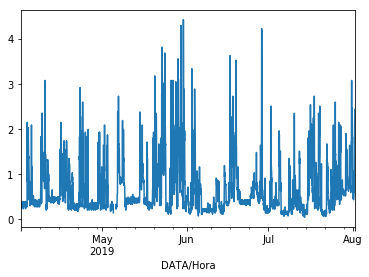

In [34]:
mm['BTI410797364'].plot()

---

In [68]:
sumdf.loc['BT2A400120898',:]

4    1583
5    3696
6    3451
7    2503
Name: BT2A400120898, dtype: int64

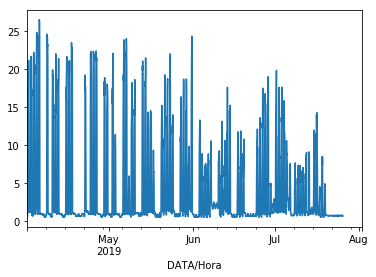

In [69]:
mm['BT2A400120898'].plot()